### The success of the adaptations

In this notebook, we will analyze the success of the adaptations themselves: are they more successful than non-adaptations? Is there a correlation between the success of a book and of its adaptation? This success can both be represented in terms of box-office, rating and engagement (number of reviews).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scripts.category_analysis import *
from scipy import stats

In [23]:
# Load the dataset adapted_movies
adapted_movies = pd.read_csv('../data/adapted_movies.csv')
adapted_movies.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",L. Frank Baum,The Wonderful Wizard of Oz,1900.0,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,"History, Silent film, Drama",Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN
2,1090641,Atlantis,1913,NaN,113.0,"English Language, Danish Language",Denmark,"Silent film, Drama, Indie, Black-and-white",Gerhart Hauptmann,Atlantis,1912.0,1912,NaN,NaN,NaN,NaN,6.5,502,"Dr. Friedrich von Kammacher , a surgeon, is de..."
3,22521524,Ivanhoe,1913,NaN,NaN,"Silent film, English Language",United States of America,"Swashbuckler films, Silent film, Drama, Adventure",Sir Walter Scott,Ivanhoe,1820.0,1820,NaN,NaN,NaN,NaN,5.6,98,"Set in late 12th century England, this silent ..."
4,18979350,Cinderella,1914,NaN,52.0,"Silent film, English Language",United States of America,"Silent film, Fantasy, Black-and-white",Charles Perrault,Cinderella,1697.0,1697,The former Well Loved Tales series have been r...,3.97,1937.0,eng,6.0,1100,Cinderella is a winsome young girl who lives w...


In [24]:
# Explode the MovieGenre column
adapted_movies_exploded = explode_MovieGenre(adapted_movies.copy())
adapted_movies_exploded.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,Silent film,L. Frank Baum,The Wonderful Wizard of Oz,1900.0,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,Black-and-white,L. Frank Baum,The Wonderful Wizard of Oz,1900.0,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,History,Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,Silent film,Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,Drama,Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN


In [25]:
# Load the inflation data
inflation_data = pd.read_csv('../data/dollar_inflation.csv')

# Merge the inflation data with the dataframe
adapted_movies = pd.merge(adapted_movies, inflation_data, left_on='MovieYear', right_on='year')
adapted_movies_exploded = pd.merge(adapted_movies_exploded, inflation_data, left_on='MovieYear', right_on='year')

# Calculate the adjusted box office
adapted_movies['MovieAdjustedBoxOffice'] = adapted_movies['MovieBoxOffice'] / adapted_movies['inflation']
adapted_movies_exploded['MovieAdjustedBoxOffice'] = adapted_movies_exploded['MovieBoxOffice'] / adapted_movies_exploded['inflation']

# Drop the year and inflation columns
adapted_movies = adapted_movies.drop(columns=['year', 'inflation'])
adapted_movies_exploded = adapted_movies_exploded.drop(columns=['year', 'inflation'])

# Display the updated dataframe
print(adapted_movies.head())
print(adapted_movies_exploded.head())

   wikipedia_id                       MovieName  MovieYear  MovieBoxOffice  \
0       5954041  The Fairylogue and Radio-Plays       1908             NaN   
1      19236804                       Cleopatra       1912             NaN   
2       1090641                        Atlantis       1913             NaN   
3      22521524                         Ivanhoe       1913             NaN   
4      18979350                      Cinderella       1914             NaN   

   MovieRuntime                      MovieLanguage            MovieCountries  \
0         120.0                   English Language  United States of America   
1          88.0                   English Language  United States of America   
2         113.0  English Language, Danish Language                   Denmark   
3           NaN      Silent film, English Language  United States of America   
4          52.0      Silent film, English Language  United States of America   

                                          MovieGen

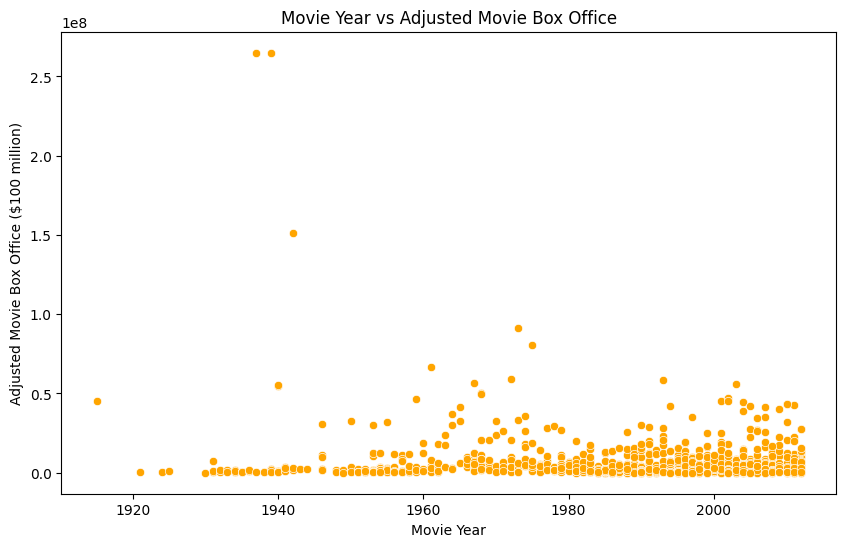

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieYear', y='MovieAdjustedBoxOffice', color='orange')
plt.title('Movie Year vs Adjusted Movie Box Office')
plt.xlabel('Movie Year')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

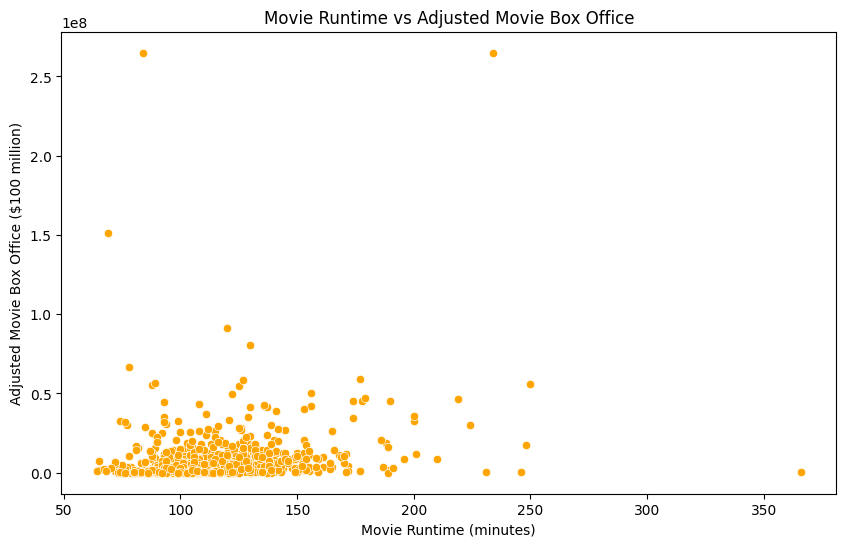

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRuntime', y='MovieAdjustedBoxOffice', color='orange')
plt.title('Movie Runtime vs Adjusted Movie Box Office')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

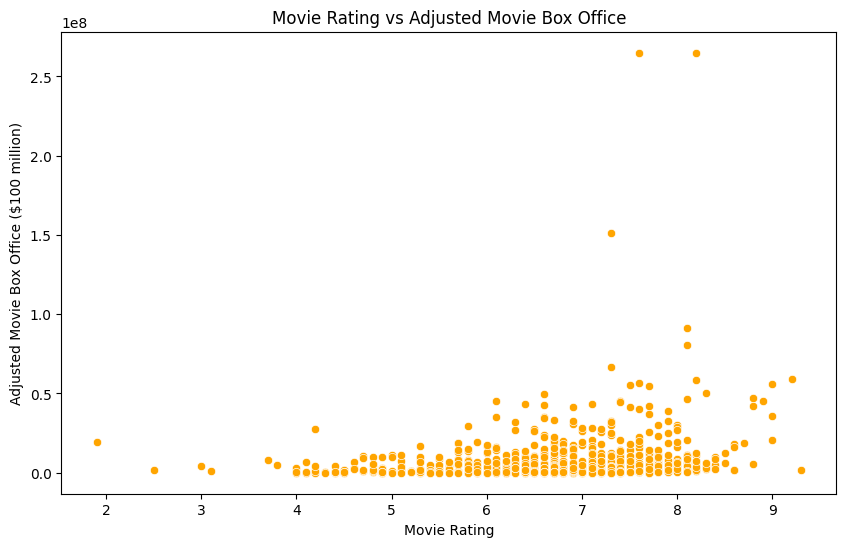

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRating', y='MovieAdjustedBoxOffice', color='orange')
plt.title('Movie Rating vs Adjusted Movie Box Office')
plt.xlabel('Movie Rating')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

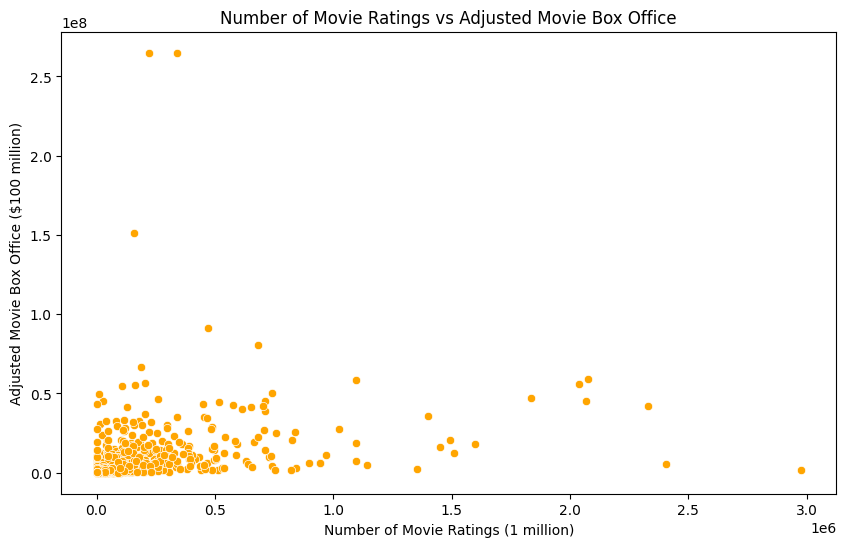

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRatingNb', y='MovieAdjustedBoxOffice', color='orange')
plt.title('Number of Movie Ratings vs Adjusted Movie Box Office')
plt.xlabel('Number of Movie Ratings (1 million)')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

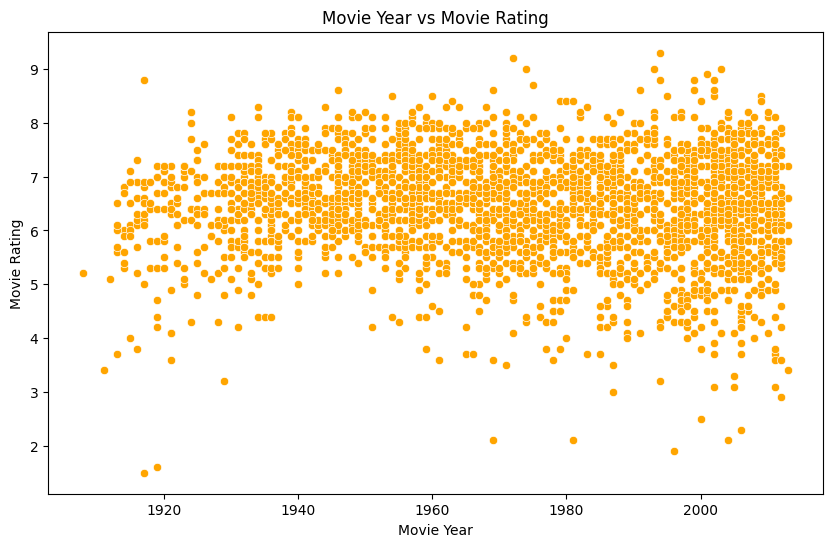

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieYear', y='MovieRating', color='orange')
plt.title('Movie Year vs Movie Rating')
plt.xlabel('Movie Year')
plt.ylabel('Movie Rating')
plt.show()

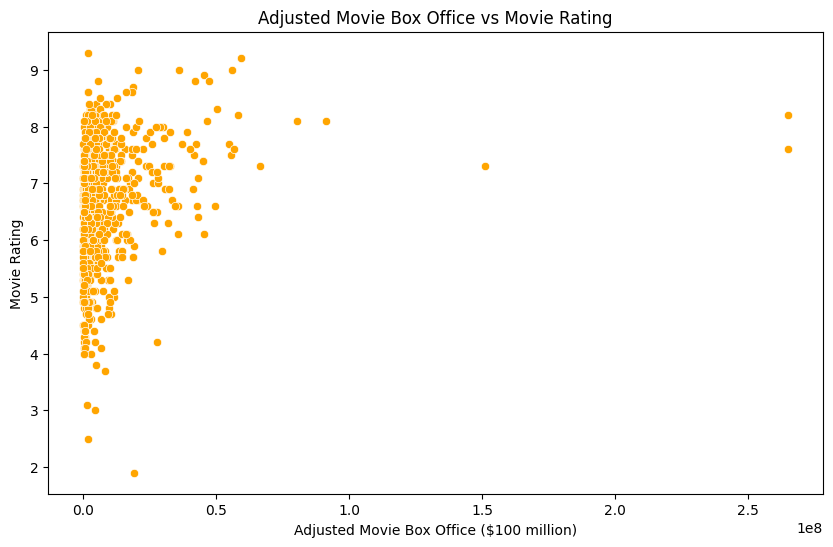

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieAdjustedBoxOffice', y='MovieRating', color='orange')
plt.title('Adjusted Movie Box Office vs Movie Rating')
plt.xlabel('Adjusted Movie Box Office ($100 million)')
plt.ylabel('Movie Rating')
plt.show()

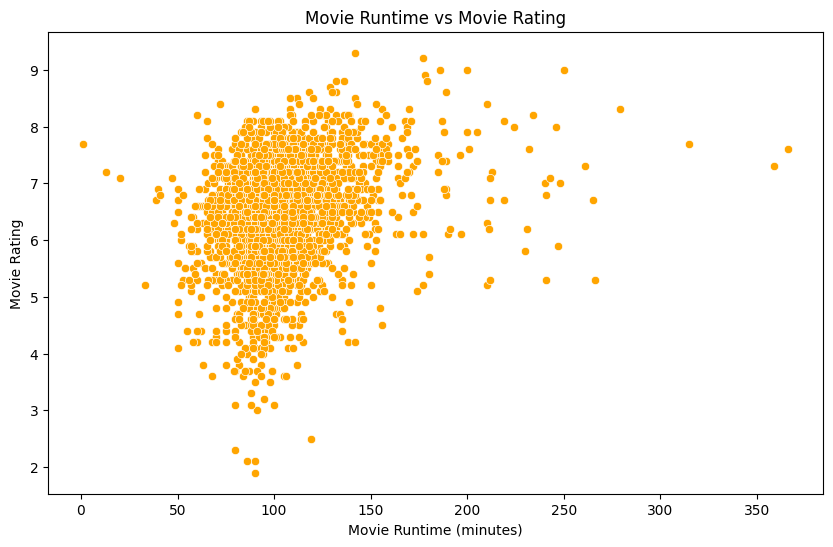

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRuntime', y='MovieRating', color='orange')
plt.title('Movie Runtime vs Movie Rating')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Movie Rating')
plt.show()

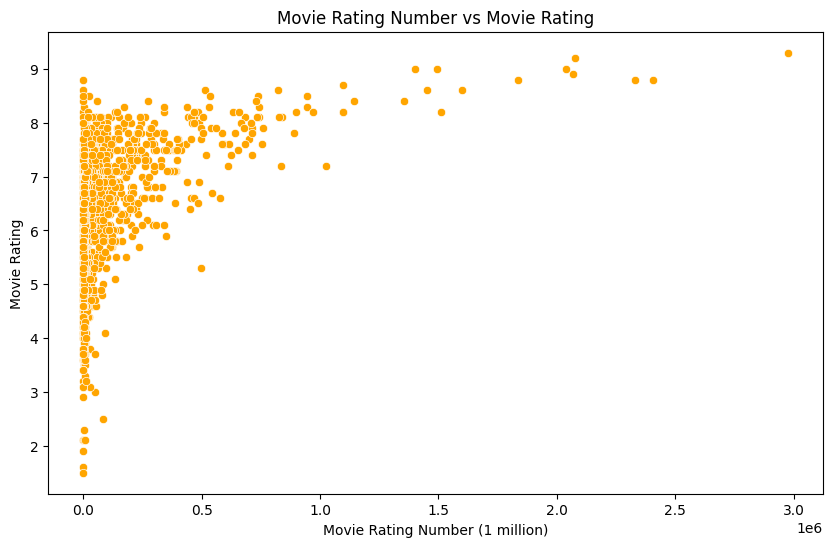

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRatingNb', y='MovieRating', color='orange')
plt.title('Movie Rating Number vs Movie Rating')
plt.xlabel('Movie Rating Number (1 million)')
plt.ylabel('Movie Rating')
plt.show()

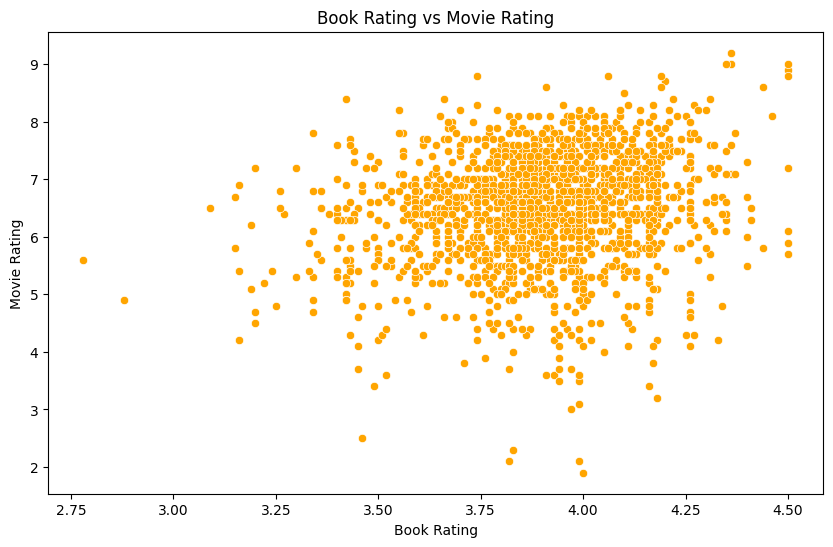

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='BookRating', y='MovieRating', color='orange')
plt.title('Book Rating vs Movie Rating')
plt.xlabel('Book Rating')
plt.ylabel('Movie Rating')
plt.show()

In [13]:
all_movies = pd.read_csv('../data/all_movies.csv')
non_adapted_movies = all_movies[~all_movies['wikipedia_id'].isin(adapted_movies['wikipedia_id'])]

In [26]:
genre_categories = load_genre_categories('../data/genre_categories.json')

adapted_movies_exploded['MovieCategory'] = adapted_movies_exploded['MovieGenre'].map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))

adapted_movies_exploded.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,...,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot,MovieAdjustedBoxOffice,MovieCategory
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,Silent film,L. Frank Baum,The Wonderful Wizard of Oz,...,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN,NaN,Classic & Silent
1,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,Black-and-white,L. Frank Baum,The Wonderful Wizard of Oz,...,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN,NaN,Classic & Silent
2,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,History,Margaret George,The Memoirs of Cleopatra,...,1997,NaN,4.18,17986.0,eng,5.1,636,NaN,NaN,Historical & Period
3,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,Silent film,Margaret George,The Memoirs of Cleopatra,...,1997,NaN,4.18,17986.0,eng,5.1,636,NaN,NaN,Classic & Silent
4,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,Drama,Margaret George,The Memoirs of Cleopatra,...,1997,NaN,4.18,17986.0,eng,5.1,636,NaN,NaN,Drama


Correlation Adjusted Box Office - Runtime

In [27]:
adapted_movies_adjustedboxoffice_runtime = adapted_movies_exploded.copy()
adapted_movies_adjustedboxoffice_runtime = adapted_movies_adjustedboxoffice_runtime.dropna(subset=['MovieAdjustedBoxOffice', 'MovieRuntime'])
pearson_adjustedboxoffice_runtime = stats.pearsonr(adapted_movies_adjustedboxoffice_runtime['MovieAdjustedBoxOffice'], adapted_movies_adjustedboxoffice_runtime['MovieRuntime'])
spearman_adjustedboxoffice_runtime = stats.spearmanr(adapted_movies_adjustedboxoffice_runtime['MovieAdjustedBoxOffice'], adapted_movies_adjustedboxoffice_runtime['MovieRuntime'])


print(pearson_adjustedboxoffice_runtime)
print(spearman_adjustedboxoffice_runtime)

PearsonRResult(statistic=0.2303110970595997, pvalue=8.697128270413596e-74)
SignificanceResult(statistic=0.3106624382847388, pvalue=9.680064375499798e-136)


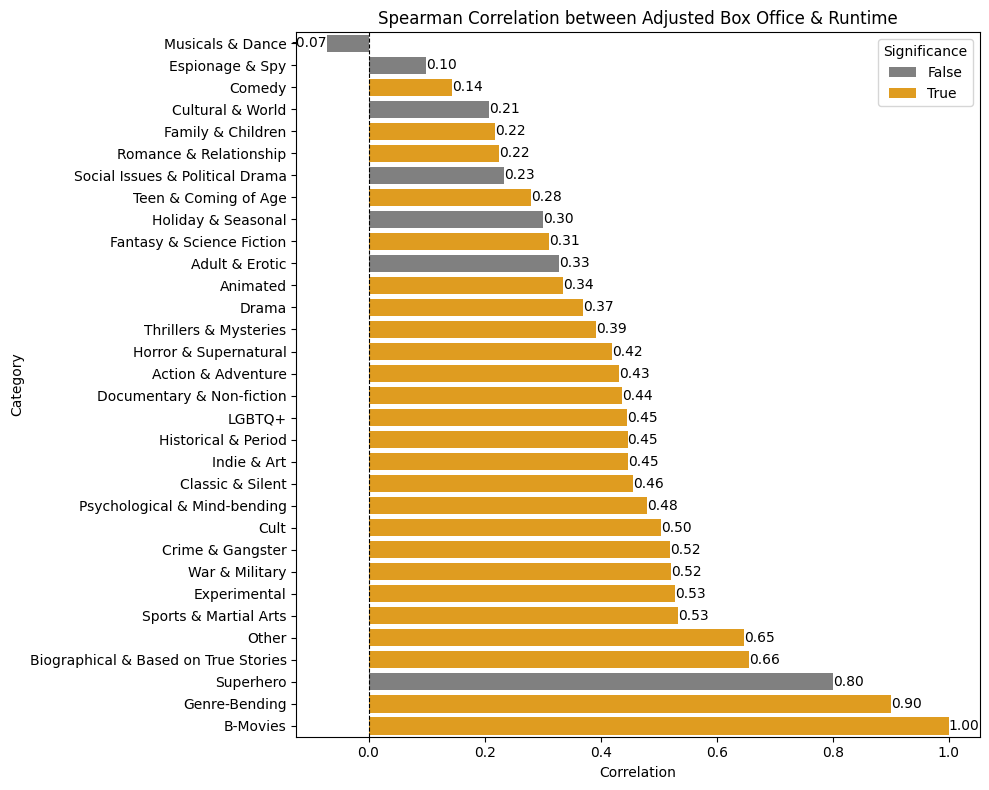

In [28]:
corr_adjustedboxoffice_runtime = category_correlation('spearman', adapted_movies_adjustedboxoffice_runtime, 'MovieAdjustedBoxOffice', 'MovieRuntime')
plot_category_correlation(corr_adjustedboxoffice_runtime, 'Spearman Correlation between Adjusted Box Office & Runtime')